In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import trompy as tp
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
with open("C://Data//hislight_pickles//restricted_dark.pickle", 'rb') as handle:
    PVH = pickle.load(handle)

with open("C://Data//hislight_pickles//HL3_restricted_dark.pickle", 'rb') as handle:
    VMH = pickle.load(handle)    

In [27]:
colors_PVH = "#219C90"
colors_VMH  = "#90219c"

In [12]:
PVH_mouse_to_be_analyzed = "HL210"
VMH_mouse_to_be_analyzed = "HL310"

In [13]:
def get_snips(data, mouse):
    
    snips_start = []
    snips_end = []
    snips_full = []

    kwargs={"bins":150, "trial_length":15, "baseline_length":5}   

    pre = 5
    post = 10
    mineventlength=10
    binlength=0.1

    for key, val in data.items():
        if val["mouse_ID"]==mouse:
            if len(val["licks"]) < 10:
                continue

            lickdata= tp.lickCalc(val["licks"], minrunlength=3)

            snips_start.append(tp.snipper(val["corrected"], lickdata["rStart"], val["fs"], **kwargs)[0])
            snips_end.append(tp.snipper(val["corrected"], lickdata["rEnd"], val["fs"], **kwargs)[0])

            snipper = tp.Snipper(val["corrected"],
                                    lickdata["rStart"],
                                    end=lickdata["rEnd"],
                                    fs=val["fs"],
                                    pre=pre,
                                    post=post,
                                    binlength=binlength,
                                    zscore=True
                                    )

            snipper.truncate_to_same_length(cols_to_add=10, mineventlength=mineventlength)
            snipper.find_potential_artifacts(threshold=8, method="sum")
            snips_full.append(snipper.snips)


    snips_start = np.vstack(snips_start)
    snips_end = np.vstack(snips_end)

    try:
        snips_full = np.vstack(snips_full)
        print("adding this mouse")
    except:
        print("no snips to concatenate")


    return snips_start, snips_end, snips_full

In [14]:
PVH_snips_start, PVH_snips_end, PVH_snips_full = get_snips(PVH, PVH_mouse_to_be_analyzed)
VMH_snips_start, VMH_snips_end, VMH_snips_full = get_snips(VMH, VMH_mouse_to_be_analyzed)

<class 'numpy.ndarray'>
Found 8 potential artifacts.
<class 'numpy.ndarray'>
Found 3 potential artifacts.
<class 'numpy.ndarray'>
adding this mouse
<class 'numpy.ndarray'>
Found 1 potential artifacts.
<class 'numpy.ndarray'>
Found 2 potential artifacts.
<class 'numpy.ndarray'>
Found 1 potential artifacts.
adding this mouse


In [19]:
pre = 5
post = 10
mineventlength=10
binlength=0.1

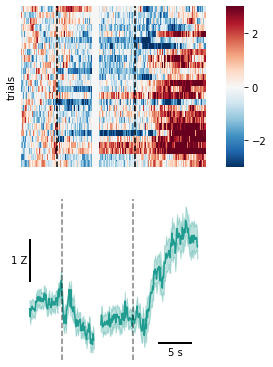

In [28]:
#PVH mouse
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[4,6.5],
                                        gridspec_kw={"width_ratios":[10,1]})

sns.heatmap(PVH_snips_full, ax=ax1, cbar_ax= ax2, cmap="RdBu_r", vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]})    

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

x1 = np.arange(0,bins_early)
x2 = np.arange(PVH_snips_full.shape[1] - bins_late, PVH_snips_full.shape[1])

mean = np.mean(PVH_snips_full, axis=0)
error_values = np.std(PVH_snips_full, axis=0) / np.sqrt(len(PVH_snips_full))

color=colors_PVH

ax3.plot(x1, mean[:bins_early], color=color)
ax3.plot(x2, mean[-bins_late:], color=color)
ax3.fill_between(x1, mean[:bins_early]-error_values[:bins_early], mean[:bins_early]+error_values[:bins_early], color=color, alpha=0.3)
ax3.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], mean[-bins_late:]+error_values[-bins_late:], color=color, alpha=0.3)


# tp.shadedError(ax3, snips_full)
ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="black", linestyle="--")
ax1.axvline(160, color="black", linestyle="--")

ax3.set_yticks([])
ax3.set_xticks([])

ax1.set_ylabel("trials")


for spine in ["top", "right", "left", "bottom"]:
    ax3.spines[spine].set_visible(False)

ax3.plot([200,250], [-1,-1], linewidth=2, color="k")
ax3.text(225,-1.1,"5 s", va="top", ha="center")

ax3.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax3.text(-3, 1, "1 Z", va="center", ha="right")

ax3.axvline(50, color="k", linestyle="--", alpha=0.5)
ax3.axvline(160, color="k", linestyle="--", alpha=0.5)

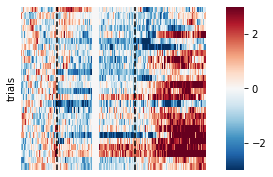

In [55]:
#PVH just heatmap

f,[ax1, ax2]=plt.subplots(ncols=2,
                        figsize=[4,3],
                        gridspec_kw={"width_ratios":[10,1]})

sns.heatmap(PVH_snips_full, ax=ax1, cbar_ax= ax2, cmap="RdBu_r", vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]}) 

ax1.set_ylabel("trials")

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="black", linestyle="--")
ax1.axvline(160, color="black", linestyle="--")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\PVH_rep_heatmap.pdf")

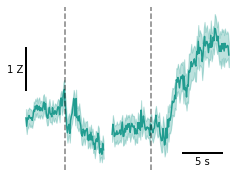

In [51]:
#PVH just squiggle

f,ax=plt.subplots(figsize=[4,3])

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

x1 = np.arange(0,bins_early)
x2 = np.arange(PVH_snips_full.shape[1] - bins_late, PVH_snips_full.shape[1])

mean = np.mean(PVH_snips_full, axis=0)
error_values = np.std(PVH_snips_full, axis=0) / np.sqrt(len(PVH_snips_full))

color=colors_PVH

ax.plot(x1, mean[:bins_early], color=color)
ax.plot(x2, mean[-bins_late:], color=color)
ax.fill_between(x1, mean[:bins_early]-error_values[:bins_early], mean[:bins_early]+error_values[:bins_early], color=color, alpha=0.3)
ax.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], mean[-bins_late:]+error_values[-bins_late:], color=color, alpha=0.3)

ax.set_yticks([])
ax.set_xticks([])


for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.plot([200,250], [-1,-1], linewidth=2, color="k")
ax.text(225,-1.1,"5 s", va="top", ha="center")

ax.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax.text(-3, 1, "1 Z", va="center", ha="right")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(160, color="k", linestyle="--", alpha=0.5)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\PVH_rep_squiggle.pdf")

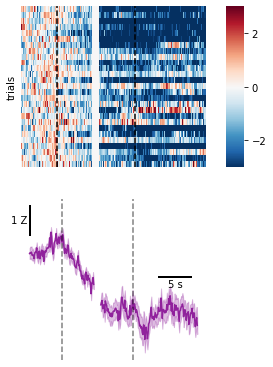

In [29]:
#VMH mouse
f,[[ax1, ax2], [ax3, ax4]]=plt.subplots(nrows=2, ncols=2,
                                        figsize=[4,6.5],
                                        gridspec_kw={"width_ratios":[10,1]})

sns.heatmap(VMH_snips_full, ax=ax1, cbar_ax= ax2, cmap="RdBu_r", vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]})    

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

x1 = np.arange(0,bins_early)
x2 = np.arange(VMH_snips_full.shape[1] - bins_late, VMH_snips_full.shape[1])

mean = np.mean(VMH_snips_full, axis=0)
error_values = np.std(VMH_snips_full, axis=0) / np.sqrt(len(VMH_snips_full))

color=colors_VMH

ax3.plot(x1, mean[:bins_early], color=color)
ax3.plot(x2, mean[-bins_late:], color=color)
ax3.fill_between(x1, mean[:bins_early]-error_values[:bins_early], mean[:bins_early]+error_values[:bins_early], color=color, alpha=0.3)
ax3.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], mean[-bins_late:]+error_values[-bins_late:], color=color, alpha=0.3)


# tp.shadedError(ax3, snips_full)
ax4.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="black", linestyle="--")
ax1.axvline(160, color="black", linestyle="--")

ax3.set_yticks([])
ax3.set_xticks([])

ax1.set_ylabel("trials")


for spine in ["top", "right", "left", "bottom"]:
    ax3.spines[spine].set_visible(False)

ax3.plot([200,250], [-1,-1], linewidth=2, color="k")
ax3.text(225,-1.1,"5 s", va="top", ha="center")

ax3.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax3.text(-3, 1, "1 Z", va="center", ha="right")

ax3.axvline(50, color="k", linestyle="--", alpha=0.5)
ax3.axvline(160, color="k", linestyle="--", alpha=0.5)

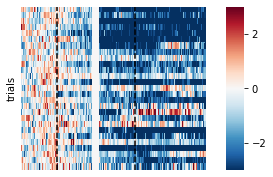

In [54]:
#VMH just heatmap

f,[ax1, ax2]=plt.subplots(ncols=2,
                        figsize=[4,3],
                        gridspec_kw={"width_ratios":[10,1]})

sns.heatmap(VMH_snips_full, ax=ax1, cbar_ax= ax2, cmap="RdBu_r", vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]}) 

ax1.set_ylabel("trials")

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="black", linestyle="--")
ax1.axvline(160, color="black", linestyle="--")

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\VMH_rep_heatmap.pdf")

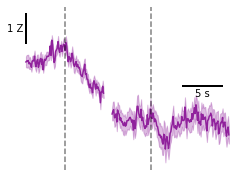

In [53]:
#VMH just squiggle

f,ax=plt.subplots(figsize=[4,3])

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

x1 = np.arange(0,bins_early)
x2 = np.arange(VMH_snips_full.shape[1] - bins_late, VMH_snips_full.shape[1])

mean = np.mean(VMH_snips_full, axis=0)
error_values = np.std(VMH_snips_full, axis=0) / np.sqrt(len(VMH_snips_full))

color=colors_VMH

ax.plot(x1, mean[:bins_early], color=color)
ax.plot(x2, mean[-bins_late:], color=color)
ax.fill_between(x1, mean[:bins_early]-error_values[:bins_early], mean[:bins_early]+error_values[:bins_early], color=color, alpha=0.3)
ax.fill_between(x2, mean[-bins_late:]-error_values[-bins_late:], mean[-bins_late:]+error_values[-bins_late:], color=color, alpha=0.3)

ax.set_yticks([])
ax.set_xticks([])


for spine in ["top", "right", "left", "bottom"]:
    ax.spines[spine].set_visible(False)

ax.plot([200,250], [-1,-1], linewidth=2, color="k")
ax.text(225,-1.1,"5 s", va="top", ha="center")

ax.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax.text(-3, 1, "1 Z", va="center", ha="right")

ax.axvline(50, color="k", linestyle="--", alpha=0.5)
ax.axvline(160, color="k", linestyle="--", alpha=0.5)

f.savefig("C:\\Users\\kvo019\\OneDrive - UiT Office 365\\Pipette 2\\People\\Linnea\\Manuscripts\\hislight paper\\figures\\VMH_rep_squiggle.pdf")

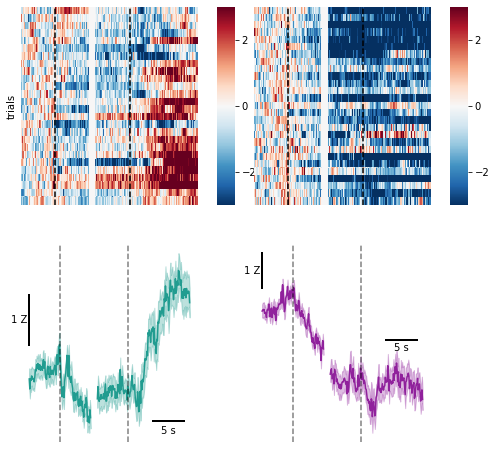

In [40]:
#both
f,[[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]]=plt.subplots(nrows=2, ncols=4,
                                        figsize=[8,8],
                                        gridspec_kw={"width_ratios":[10,1, 10,1]})

sns.heatmap(PVH_snips_full, ax=ax1, cbar_ax= ax2, cmap="RdBu_r", vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]})
sns.heatmap(VMH_snips_full, ax=ax3, cbar_ax= ax4, cmap="RdBu_r", vmax=3, vmin=-3, cbar_kws={"ticks": [2, 0, -2]})    

bins_early = int((pre + mineventlength/2)/binlength)
bins_late = int((post + mineventlength/2)/binlength)

#PVH
PVH_x1 = np.arange(0,bins_early)
PVH_x2 = np.arange(PVH_snips_full.shape[1] - bins_late, PVH_snips_full.shape[1])

PVH_mean = np.mean(PVH_snips_full, axis=0)
PVH_error_values = np.std(PVH_snips_full, axis=0) / np.sqrt(len(PVH_snips_full))

ax5.plot(PVH_x1, PVH_mean[:bins_early], color=colors_PVH)
ax5.plot(PVH_x2, PVH_mean[-bins_late:], color=colors_PVH)
ax5.fill_between(PVH_x1, PVH_mean[:bins_early]-PVH_error_values[:bins_early], PVH_mean[:bins_early]+PVH_error_values[:bins_early], color=colors_PVH, alpha=0.3)
ax5.fill_between(PVH_x2, PVH_mean[-bins_late:]-PVH_error_values[-bins_late:], PVH_mean[-bins_late:]+PVH_error_values[-bins_late:], color=colors_PVH, alpha=0.3)

#VMH
VMH_x1 = np.arange(0,bins_early)
VMH_x2 = np.arange(VMH_snips_full.shape[1] - bins_late, VMH_snips_full.shape[1])

VMH_mean = np.mean(VMH_snips_full, axis=0)
VMH_error_values = np.std(VMH_snips_full, axis=0) / np.sqrt(len(VMH_snips_full))

ax7.plot(VMH_x1, VMH_mean[:bins_early], color=colors_VMH)
ax7.plot(VMH_x2, VMH_mean[-bins_late:], color=colors_VMH)
ax7.fill_between(VMH_x1, VMH_mean[:bins_early]-VMH_error_values[:bins_early], VMH_mean[:bins_early]+VMH_error_values[:bins_early], color=colors_VMH, alpha=0.3)
ax7.fill_between(VMH_x2, VMH_mean[-bins_late:]-VMH_error_values[-bins_late:], VMH_mean[-bins_late:]+VMH_error_values[-bins_late:], color=colors_VMH, alpha=0.3)


# tp.shadedError(ax3, snips_full)
ax6.remove()
ax8.remove()

ax1.set_yticks([])
ax1.set_xticks([])
ax1.axvline(50, color="black", linestyle="--")
ax1.axvline(160, color="black", linestyle="--")

ax3.set_yticks([])
ax3.set_xticks([])
ax3.axvline(50, color="black", linestyle="--")
ax3.axvline(160, color="black", linestyle="--")

ax1.set_ylabel("trials")

ax5.set_yticks([])
ax5.set_xticks([])

ax7.set_yticks([])
ax7.set_xticks([])

for spine in ["top", "right", "left", "bottom"]:
    ax5.spines[spine].set_visible(False)
    ax7.spines[spine].set_visible(False)

ax5.plot([200,250], [-1,-1], linewidth=2, color="k")
ax5.text(225,-1.1,"5 s", va="top", ha="center")

ax5.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax5.text(-3, 1, "1 Z", va="center", ha="right")

ax5.axvline(50, color="k", linestyle="--", alpha=0.5)
ax5.axvline(160, color="k", linestyle="--", alpha=0.5)

ax7.plot([200,250], [-1,-1], linewidth=2, color="k")
ax7.text(225,-1.1,"5 s", va="top", ha="center")

ax7.plot([0,0], [0.5, 1.5], linewidth=2, color="k")
ax7.text(-3, 1, "1 Z", va="center", ha="right")

ax7.axvline(50, color="k", linestyle="--", alpha=0.5)
ax7.axvline(160, color="k", linestyle="--", alpha=0.5)